In [7]:
import pandas as pd
import numpy as np
% load_ext rpy2.ipython # http://rpy.sourceforge.net/rpy2/doc-2.5/html/introduction.html

In [9]:
%R require(ggplot2)

array([1], dtype=int32)

In [10]:
df_gdp = pd.read_csv('/home/xenakas/Desktop/Git/hierarchical_modelling/data/us/naus_unlabelled.csv')

del df_gdp['Unnamed: 0']

df_gdp['series_id'] = [x[:-5] for x in df_gdp['series_id']]

ids = df_gdp['series_id'].unique()

df_gdp['state'] = [df_gdp['series_id'][x][:2] for  x  in range(len(df_gdp['series_id']))]
df_gdp['ind'] = [df_gdp['series_id'][x][2:] for  x  in range(len(df_gdp['series_id']))]
df_gdp['reg'] = [df_gdp['series_id'][x][:3] for  x  in range(len(df_gdp['series_id']))]
df_gdp['indus'] = [df_gdp['ind'][x][:3] for  x  in range(len(df_gdp['ind']))]


df_gdp = df_gdp.replace('', 'TOTAL')

df_gdp = df_gdp[df_gdp['ind'] != 'TOTAL']

#df_gdp = df_gdp[df_gdp['ind'] != 'RQGSP']

df_gdp = df_gdp[df_gdp['state'] != 'US']

df_gdp = df_gdp[df_gdp['reg'] != 'GLA']

df_gdp = df_gdp[df_gdp['reg'] != 'NEN']

df_gdp = df_gdp[df_gdp['reg'] != 'PLN']

df_gdp = df_gdp[df_gdp['reg'] != 'PLN']

df_gdp = df_gdp[df_gdp['reg'] != 'RKM']

df_gdp = df_gdp[df_gdp['reg'] != 'SES']

df_gdp = df_gdp[df_gdp['reg'] != 'MES']

df_gdp = df_gdp[df_gdp['reg'] != 'SWS']

df_gdp = df_gdp[df_gdp['reg'] != 'FWS']


#del df_gdp['series_id']

In [11]:
df_gdp['indus'] = df_gdp['indus'].replace('PI', 'PIT')

In [12]:
df_gdp['indus'].unique()

array(['INF', 'AGR', 'RET', 'DUR', 'TRA', 'NDU', 'ACC', 'HLT', 'CON',
       'PIT', 'GOV', 'UTI', 'MAN', 'MNG', 'ADM', 'MIN', 'RER', 'EDC',
       'ART', 'OTH', 'FIN', 'WHO', 'PRO'], dtype=object)

In [13]:
df_gdp['index'] = df_gdp['state'] + df_gdp['indus']
del df_gdp['state']
del df_gdp['ind']
del df_gdp['indus']


In [14]:
pivot_gdp = pd.pivot_table(df_gdp, index='date', columns= 'index', values = 'value')
pivot_gdp



index,AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,AKHLT,...,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,1213.0,735.0,286.0,192.0,2465.0,175.0,132.0,1126.0,8691.0,2243.0,...,125.0,1211.0,555.0,25008.0,783.0,2473.0,1683.0,1737.0,724.0,1088.0
2005-04-01,1216.0,772.0,340.0,194.0,2476.0,177.0,131.0,1130.0,8614.0,2231.0,...,101.0,1210.0,543.0,26017.0,756.0,2707.0,1713.0,1765.0,702.0,1136.0
2005-07-01,1206.0,770.0,452.0,200.0,2423.0,173.0,134.0,1190.0,8534.0,2322.0,...,154.0,1203.0,557.0,24948.0,752.0,2410.0,1734.0,1877.0,788.0,1150.0
2005-10-01,1215.0,734.0,607.0,196.0,2304.0,165.0,144.0,1162.0,8696.0,2291.0,...,92.0,1287.0,564.0,25186.0,772.0,2375.0,1739.0,1900.0,709.0,1182.0
2006-01-01,1236.0,735.0,487.0,191.0,2280.0,172.0,137.0,1052.0,8587.0,2333.0,...,105.0,1304.0,617.0,27168.0,795.0,2427.0,1783.0,2029.0,762.0,1243.0
2006-04-01,1255.0,746.0,467.0,197.0,2255.0,171.0,136.0,1019.0,8666.0,2336.0,...,145.0,1433.0,637.0,28202.0,823.0,2481.0,1852.0,2101.0,834.0,1281.0
2006-07-01,1241.0,754.0,422.0,189.0,2135.0,171.0,137.0,1004.0,8695.0,2321.0,...,162.0,1468.0,645.0,29427.0,847.0,2622.0,1815.0,2100.0,696.0,1296.0
2006-10-01,1246.0,777.0,397.0,191.0,2138.0,174.0,134.0,1004.0,8746.0,2310.0,...,118.0,1602.0,660.0,29893.0,838.0,2756.0,1890.0,2094.0,789.0,1352.0
2007-01-01,1271.0,780.0,377.0,199.0,2102.0,186.0,133.0,993.0,8721.0,2312.0,...,105.0,1579.0,686.0,29861.0,833.0,2642.0,1945.0,2051.0,742.0,1386.0


In [29]:
pivot_gdp.to_csv("gdp_us_state_ind.csv")

In [31]:
k = pd.DataFrame(pivot_gdp[['AKACC', 'AKADM']])

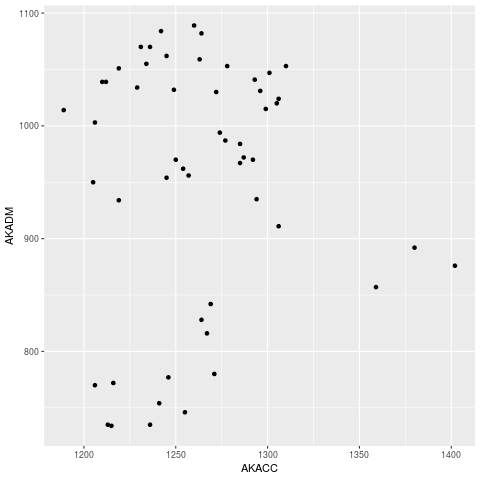

In [33]:
%%R -i k
ggplot(data = k)  + geom_point(aes(x=AKACC, y = AKADM))

In [35]:
x = pivot_gdp['AKACC']
y = pivot_gdp['AKADM']

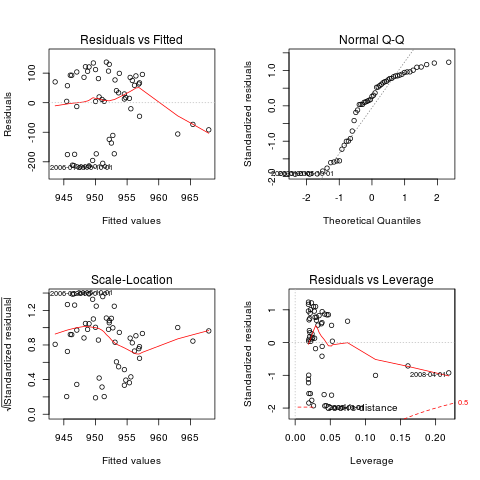

In [37]:
%%R -i x,y -o mycoef
model = lm(y~x)
mycoef = coef(model)
par(mfrow = c(2,2))
plot(model)

In [40]:
print(mycoef)

(Intercept)           x 
808.1104058   0.1139758 



In [42]:
%%R
print(summary(model))
ls(model)
residuals(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-213.99  -91.91   29.43   90.61  137.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 808.1104   454.8994   1.776   0.0816 .
x             0.1140     0.3601   0.317   0.7529  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 112.3 on 51 degrees of freedom
Multiple R-squared:  0.001961,	Adjusted R-squared:  -0.01761 
F-statistic: 0.1002 on 1 and 51 DF,  p-value: 0.7529

 2005-01-01  2005-04-01  2005-07-01  2005-10-01  2006-01-01  2006-04-01 
-211.363086 -174.705014 -175.565255 -212.591038 -213.984530 -205.150071 
 2006-07-01  2006-10-01  2007-01-01  2007-04-01  2007-07-01  2007-10-01 
-195.554409 -173.124289 -172.973684 -136.517781 -124.175854 -110.745733 
 2008-01-01  2008-04-01  2008-07-01  2008-10-01  2009-01-01  2009-04-01 
-106.003557  -91.904518  -73.397050  -45.962838  -20.595128  -13.046941 
 2009-07-01  2009-10-01  2010-01-